<a href="https://colab.research.google.com/github/priyxnshu07/UCS420/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 10

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).


1. Convert text to lowercase and remove punctuation using re.


In [1]:
import re

text = """Dogs are friendly animals. They love to play with children and run in the park. Some dogs help police and protect people. They can also learn cool tricks like sitting or shaking hands. Dogs are loyal and always excited to see their owners."""

text_lower = text.lower()
text_clean = re.sub(r'[^\w\s]', '', text_lower)

print(text_clean)

dogs are friendly animals they love to play with children and run in the park some dogs help police and protect people they can also learn cool tricks like sitting or shaking hands dogs are loyal and always excited to see their owners


2. Tokenize the text into words and sentences.


In [2]:
import nltk
nltk.download('punkt_tab')

word_tokens = nltk.word_tokenize(text_clean)
sentence_tokens = nltk.sent_tokenize(text_clean)

print("Word Tokens:", word_tokens[:10])
print("Sentence Tokens:", sentence_tokens[:3])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Word Tokens: ['dogs', 'are', 'friendly', 'animals', 'they', 'love', 'to', 'play', 'with', 'children']
Sentence Tokens: ['dogs are friendly animals they love to play with children and run in the park some dogs help police and protect people they can also learn cool tricks like sitting or shaking hands dogs are loyal and always excited to see their owners']


3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.


In [3]:
split_text = text_clean.split()

word_tokens_nltk = nltk.word_tokenize(text_clean)

print("Tokens using split():", split_text[:10])
print("Tokens using word_tokenize():", word_tokens_nltk[:10])

Tokens using split(): ['dogs', 'are', 'friendly', 'animals', 'they', 'love', 'to', 'play', 'with', 'children']
Tokens using word_tokenize(): ['dogs', 'are', 'friendly', 'animals', 'they', 'love', 'to', 'play', 'with', 'children']


4. Remove stopwords (using NLTK's stopwords list).


In [4]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_words = [word for word in word_tokens_nltk if word.lower() not in stop_words]

print("Filtered Words:", filtered_words[:10])

Filtered Words: ['dogs', 'friendly', 'animals', 'love', 'play', 'children', 'run', 'park', 'dogs', 'help']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


5. Display word frequency distribution (excluding stopwords).

In [5]:
from nltk import FreqDist

fdist = FreqDist(filtered_words)

print(fdist.most_common(10))

[('dogs', 3), ('friendly', 1), ('animals', 1), ('love', 1), ('play', 1), ('children', 1), ('run', 1), ('park', 1), ('help', 1), ('police', 1)]


**Q2. Using the same paragraph from Q1:**

1. Extract all words with only alphabets using re.findall()


In [6]:
import re

words_only_alpha = re.findall(r'\b[a-zA-Z]+\b', text.lower())

print("Words with only alphabets:", words_only_alpha[:10])

Words with only alphabets: ['dogs', 'are', 'friendly', 'animals', 'they', 'love', 'to', 'play', 'with', 'children']


2. Remove stop words using NLTK’s stopword list


In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_alpha_words = [word for word in words_only_alpha if word not in stop_words]

print("Filtered words without stopwords:", filtered_alpha_words[:10])

Filtered words without stopwords: ['dogs', 'friendly', 'animals', 'love', 'play', 'children', 'run', 'park', 'dogs', 'help']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3. Perform stemming with PorterStemmer


In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in filtered_alpha_words]

print("Stemmed words:", stemmed_words[:10])

Stemmed words: ['dog', 'friendli', 'anim', 'love', 'play', 'children', 'run', 'park', 'dog', 'help']


4. Perform lemmatization with WordNetLemmaƟzer


In [9]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha_words]

print("Lemmatized words:", lemmatized_words[:10])

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatized words: ['dog', 'friendly', 'animal', 'love', 'play', 'child', 'run', 'park', 'dog', 'help']


5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over
the other.

In [10]:
for stem, lemma in zip(stemmed_words[:10], lemmatized_words[:10]):
    print(f"Stemmed: {stem}, Lemmatized: {lemma}")

Stemmed: dog, Lemmatized: dog
Stemmed: friendli, Lemmatized: friendly
Stemmed: anim, Lemmatized: animal
Stemmed: love, Lemmatized: love
Stemmed: play, Lemmatized: play
Stemmed: children, Lemmatized: child
Stemmed: run, Lemmatized: run
Stemmed: park, Lemmatized: park
Stemmed: dog, Lemmatized: dog
Stemmed: help, Lemmatized: help


**Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).**


In [11]:
texts = [
    "Electric vehicles are the future of transportation.",
    "Battery life and charging time are improving fast.",
    "Renewable energy supports sustainable mobility."
]

1. Use CountVectorizer to generate the Bag of Words representation.


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(texts)

words = count_vectorizer.get_feature_names_out()

bag_of_words_array = bag_of_words.toarray()

print("Bag of Words Representation (CountVectorizer):")
print(bag_of_words_array)
print("Words (features):", words)

Bag of Words Representation (CountVectorizer):
[[0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1]
 [1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0]]
Words (features): ['and' 'are' 'battery' 'charging' 'electric' 'energy' 'fast' 'future'
 'improving' 'life' 'mobility' 'of' 'renewable' 'supports' 'sustainable'
 'the' 'time' 'transportation' 'vehicles']


2. Use TfidfVectorizer to compute TF-IDF scores.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

tfidf_words = tfidf_vectorizer.get_feature_names_out()

tfidf_array = tfidf_matrix.toarray()

print("\nTF-IDF Scores (TfidfVectorizer):")
print(tfidf_array)
print("Words (features):", tfidf_words)


TF-IDF Scores (TfidfVectorizer):
[[0.         0.29651988 0.         0.         0.38988801 0.
  0.         0.38988801 0.         0.         0.         0.38988801
  0.         0.         0.         0.38988801 0.         0.38988801
  0.38988801]
 [0.36325471 0.27626457 0.36325471 0.36325471 0.         0.
  0.36325471 0.         0.36325471 0.36325471 0.         0.
  0.         0.         0.         0.         0.36325471 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.4472136
  0.         0.         0.         0.         0.4472136  0.
  0.4472136  0.4472136  0.4472136  0.         0.         0.
  0.        ]]
Words (features): ['and' 'are' 'battery' 'charging' 'electric' 'energy' 'fast' 'future'
 'improving' 'life' 'mobility' 'of' 'renewable' 'supports' 'sustainable'
 'the' 'time' 'transportation' 'vehicles']


3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [14]:
import numpy as np

print("\nTop 3 Keywords Using TF-IDF:")

for i, text in enumerate(texts):
    tfidf_scores = tfidf_array[i]

    top_3_indices = np.argsort(tfidf_scores)[::-1][:3]

    top_3_keywords = [tfidf_words[index] for index in top_3_indices]

    print(f"Text {i+1}: '{text}'")
    print("Top 3 Keywords:", top_3_keywords)
    print()


Top 3 Keywords Using TF-IDF:
Text 1: 'Electric vehicles are the future of transportation.'
Top 3 Keywords: ['vehicles', 'transportation', 'the']

Text 2: 'Battery life and charging time are improving fast.'
Top 3 Keywords: ['time', 'improving', 'life']

Text 3: 'Renewable energy supports sustainable mobility.'
Top 3 Keywords: ['renewable', 'supports', 'sustainable']



**Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).**

In [15]:
text1 = """Artificial Intelligence enables smart automation in industries.
It helps machines to learn from data, recognize patterns, and make decisions like humans.
AI is used in healthcare, manufacturing, and even in personal assistants such as Siri and Alexa.
It improves efficiency, reduces errors, and transforms how businesses operate every day."""

text2 = """Blockchain is a secure digital ledger technology that records transactions in a decentralized manner.
It ensures transparency, prevents data tampering, and is used in cryptocurrencies like Bitcoin and Ethereum.
Blockchain can also be used in supply chain management, voting systems, and digital identity verification.
It eliminates the need for intermediaries, making processes faster and more trustworthy."""


1. Preprocess and tokenize both texts.


In [16]:
import nltk
import re
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def preprocess_and_tokenize(text):
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text_clean)
    return tokens

tokens_text1 = preprocess_and_tokenize(text1)
tokens_text2 = preprocess_and_tokenize(text2)

print("Tokens for Text 1:", tokens_text1)
print("Tokens for Text 2:", tokens_text2)

Tokens for Text 1: ['artificial', 'intelligence', 'enables', 'smart', 'automation', 'in', 'industries', 'it', 'helps', 'machines', 'to', 'learn', 'from', 'data', 'recognize', 'patterns', 'and', 'make', 'decisions', 'like', 'humans', 'ai', 'is', 'used', 'in', 'healthcare', 'manufacturing', 'and', 'even', 'in', 'personal', 'assistants', 'such', 'as', 'siri', 'and', 'alexa', 'it', 'improves', 'efficiency', 'reduces', 'errors', 'and', 'transforms', 'how', 'businesses', 'operate', 'every', 'day']
Tokens for Text 2: ['blockchain', 'is', 'a', 'secure', 'digital', 'ledger', 'technology', 'that', 'records', 'transactions', 'in', 'a', 'decentralized', 'manner', 'it', 'ensures', 'transparency', 'prevents', 'data', 'tampering', 'and', 'is', 'used', 'in', 'cryptocurrencies', 'like', 'bitcoin', 'and', 'ethereum', 'blockchain', 'can', 'also', 'be', 'used', 'in', 'supply', 'chain', 'management', 'voting', 'systems', 'and', 'digital', 'identity', 'verification', 'it', 'eliminates', 'the', 'need', 'for'

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


2. Calculate:
- Jaccard Similarity using sets
- Cosine Similarity using TfidfVectorizer + cosine_similarity()
- Analyze which similarity metric gives better insights in your case.

In [17]:
# a. Jaccard Similarity using sets
# Step 2: Jaccard Similarity
set1 = set(text1.lower().split())
set2 = set(text2.lower().split())
jaccard_similarity = len(set1 & set2) / len(set1 | set2)

In [18]:
# b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]

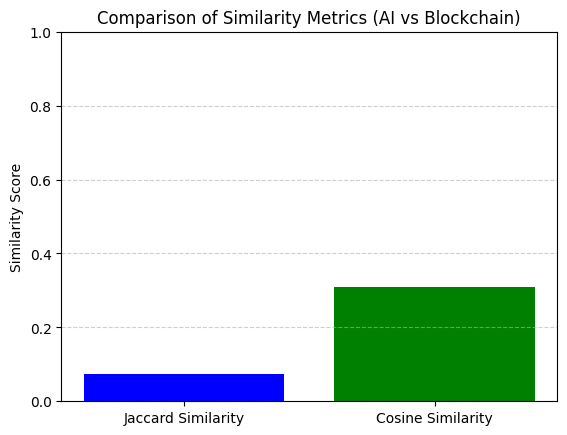

Jaccard Similarity: 0.073
Cosine Similarity: 0.308
✔️ Cosine similarity gives better insight here because it captures the difference in vocabulary and semantic context.


In [33]:
import matplotlib.pyplot as plt

similarity_scores = [jaccard_similarity, cosine_sim]
labels = ['Jaccard Similarity', 'Cosine Similarity']

plt.bar(labels, similarity_scores, color=['blue', 'green'])
plt.title("Comparison of Similarity Metrics (AI vs Blockchain)")
plt.ylabel("Similarity Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Step 5: Print scores
print(f"Jaccard Similarity: {jaccard_similarity:.3f}")
print(f"Cosine Similarity: {cosine_sim:.3f}")

# Step 6: Analysis
if cosine_sim > jaccard_similarity:
    print("✔️ Cosine similarity gives better insight here because it captures the difference in vocabulary and semantic context.")
else:
    print("✔️ Jaccard similarity gives better insight in this case.")


**Q5. Write a short review for a product or service.**

In [20]:
review1 = """I recently got a new smartphone, and it's absolutely fantastic! The camera delivers outstanding quality, and the battery lasts over a full day with heavy usage. The design is sleek and modern, and the overall performance is flawless. I highly suggest this phone for anyone looking for a trustworthy device."""

review2 = """The experience at this restaurant was awful. The food took over an hour to be served, and when it finally came, it was cold. The staff appeared uninterested in helping, and the ambiance was unpleasant. I won't be returning anytime soon."""

review3 = """I've been using this skincare cream for a week now, and it seems to be working wonders. It's incredibly moisturizing and gentle on my skin. The scent is delicate, and my skin feels significantly smoother. Overall, I'm quite pleased with this product."""
reviews = [review1, review2, review3]

1. Use TextBlob or VADER to find polarity & subjectivity for each review.


In [21]:
from textblob import TextBlob

def analyze_sentiment_textblob(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

for review in reviews:
    polarity, subjectivity = analyze_sentiment_textblob(review)
    print(f"Review: {review[:50]}... -> Polarity: {polarity}, Subjectivity: {subjectivity}")

Review: I recently got a new smartphone, and it's absolute... -> Polarity: 0.26463636363636367, Subjectivity: 0.5369545454545455
Review: The experience at this restaurant was awful. The f... -> Polarity: -0.5625, Subjectivity: 0.9875
Review: I've been using this skincare cream for a week now... -> Polarity: 0.2791666666666667, Subjectivity: 0.7458333333333332


2. Classify reviews into Positive / Negative / Neutral.


In [22]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment_vader(review):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']

for review in reviews:
    compound_score = analyze_sentiment_vader(review)
    print(f"Review: {review[:50]}... -> Compound Score: {compound_score}")

Review: I recently got a new smartphone, and it's absolute... -> Compound Score: 0.944
Review: The experience at this restaurant was awful. The f... -> Compound Score: -0.5994
Review: I've been using this skincare cream for a week now... -> Compound Score: 0.762


3. Create a word cloud using the wordcloud library for all positive reviews.

In [24]:
def classify_review_textblob(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

classified_reviews_textblob = []
for review in reviews:
    polarity, subjectivity = analyze_sentiment_textblob(review)
    sentiment_textblob = classify_review_textblob(polarity)
    classified_reviews_textblob.append((review, sentiment_textblob))

for review, sentiment in classified_reviews_textblob:
    print(f"Review: {review[:50]}... -> Sentiment: {sentiment}")

Review: I recently got a new smartphone, and it's absolute... -> Sentiment: Positive
Review: The experience at this restaurant was awful. The f... -> Sentiment: Negative
Review: I've been using this skincare cream for a week now... -> Sentiment: Positive


**Q6. Choose your own paragraph (~100 words) as training data.**

In [25]:
text = """ Artificial intelligence is reshaping various sectors by automating processes, enhancing efficiency, and empowering data-centric decision-making. Machine learning, a branch of AI, enables systems to learn from data and improve over time without explicit programming. Deep learning, which leverages multi-layered neural networks, has demonstrated remarkable success in areas like image recognition and language processing. AI holds the potential to transform industries such as healthcare, transportation, and finance, although it also raises concerns about job loss and ethical dilemmas. As AI progresses, its influence on society will be significant, making its ethical and responsible development essential for the future. """

1. Tokenize text using Tokenizer() from keras.preprocessing.text


In [26]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

sequences = tokenizer.texts_to_sequences([text])[0]

print("Sequences:", sequences)

Sequences: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 1, 22, 3, 23, 24, 4, 25, 5, 26, 27, 28, 2, 29, 30, 6, 31, 32, 3, 1, 33, 34, 35, 36, 37, 38, 39, 5, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 1, 55, 56, 2, 57, 7, 58, 6, 59, 60, 61, 8, 62, 63, 1, 64, 65, 66, 67, 68, 69, 70, 71, 72, 1, 9, 73, 8, 2, 74, 10, 75, 76, 77, 78, 79, 80, 4, 10, 9, 1, 81, 82, 83, 84, 7, 85]


2. Create input sequences and build a simple LSTM or Dense model


In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample corpus
corpus = ["AI is the future", "Blockchain powers decentralization", "AI and Blockchain are revolutionary"]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
sequences = [item for sublist in sequences for item in sublist]  # flatten to 1D list

# Sequence building
sequence_length = 5
X = []
y = []

for i in range(sequence_length, len(sequences)):
    X.append(sequences[i-sequence_length:i])
    y.append(sequences[i])

X = np.array(X)
y = np.array(y)

# Padding (usually safe here even if not needed)
X = pad_sequences(X, padding='pre')

# Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10, input_length=sequence_length))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.

In [28]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

def generate_text(seed_text, max_length=50):
    input_ids = tokenizer.encode(seed_text, return_tensors='pt')

    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, temperature=0.7, top_p=0.9, top_k=50)

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

seed_word = "Artificial intelligence"
generated_text = generate_text(seed_word, max_length=100)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpec

In [29]:
print("\nGenerated Text:", generated_text)


Generated Text: Artificial intelligence is a new field of research that has been in the works for a while now. It is now possible to create artificial intelligence that can perform tasks that are difficult to perform in real life.

The research was published in Nature Communications. The researchers used a computer program called DeepMind to analyze the neural networks of a group of people who were asked to complete tasks in a virtual reality environment. They then used the program to learn how to use the computer to solve the tasks. This
